# eda

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering as AC
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_excel('C:/Users/haris/Downloads/assignment ds/clustering/EastWestAirlines.xlsx',sheet_name='data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [4]:
def range_x(x):
    return (np.min(x),np.max(x))
for i in range(1,12):
    print(df.columns[i],range_x(df.iloc[:,i]),end=' ')
    print()
# from range of values it is evident that cc1_miles,cc2_miles,cc3_miles,award column doesn't provide much info(less variance)
# so dropping those columns

Balance (0, 1704838) 
Qual_miles (0, 11148) 
cc1_miles (1, 5) 
cc2_miles (1, 3) 
cc3_miles (1, 5) 
Bonus_miles (0, 263685) 
Bonus_trans (0, 86) 
Flight_miles_12mo (0, 30817) 
Flight_trans_12 (0, 53) 
Days_since_enroll (2, 8296) 
Award? (0, 1) 


In [5]:
df1=df.drop(columns=['cc1_miles', 'cc2_miles', 'cc3_miles','Award?'],axis=1)
#as there is no null values so no need of imputation

In [6]:
df1

,ID#,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,1,28143,0,174,1,0,0,7000
1,2,19244,0,215,2,0,0,6968
2,3,41354,0,4123,4,0,0,7034
3,4,14776,0,500,1,0,0,6952
4,5,97752,0,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...
3994,4017,18476,0,8525,4,200,1,1403
3995,4018,64385,0,981,5,0,0,1395
3996,4019,73597,0,25447,8,0,0,1402
3997,4020,54899,0,500,1,500,1,1401


In [7]:
x=df1.iloc[:,1:].values
#feature scaling
sc_x=StandardScaler()
x=sc_x.fit_transform(x)
x

array([[-4.51140783e-01, -1.86298687e-01, -7.02786266e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.01088399e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -5.39252702e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  3.43803696e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -6.89286154e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.09991847e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

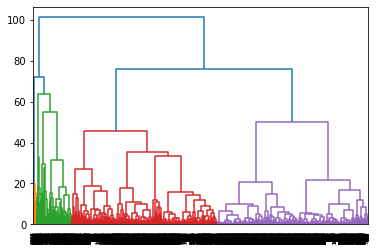

In [8]:
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))

In [9]:
cl=AC(n_clusters=7,linkage='ward',affinity='euclidean')
y_pr=cl.fit_predict(x)

In [10]:
df['cluster']=cl.labels_

In [11]:
df[df['cluster']==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,0
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,0
10,11,40091,0,2,1,1,7278,10,0,0,6959,0,0
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,0
12,13,43382,0,2,1,1,11150,20,0,0,6924,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3974,3997,58387,0,3,1,1,14581,39,0,0,1435,0,0
3978,4001,10071,0,2,1,1,27701,16,0,0,1421,1,0
3980,4003,28867,0,3,1,1,19169,28,0,0,1425,0,0
3985,4008,59017,0,4,1,1,34746,25,0,0,1418,0,0


In [12]:
df[df['cluster']==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
65,66,53914,0,3,1,1,33767,45,5550,29,6826,1,1
135,138,259484,1776,1,1,1,19172,26,7172,23,6723,1,1
323,327,278727,0,1,1,1,21666,19,9166,16,7155,1,1
475,481,171509,0,3,1,1,40090,55,6381,23,8151,1,1
511,517,9800,589,1,1,1,10348,34,3000,25,6651,1,1
531,537,98472,1776,5,1,1,124421,45,10250,28,6621,1,1
549,555,256219,0,3,1,1,29823,33,6568,16,6561,1,1
622,631,62080,2975,2,1,1,19113,32,10650,28,6434,1,1
662,671,109532,0,5,1,1,128048,53,7939,26,6372,1,1
702,712,340874,0,5,1,1,68090,43,5676,27,6305,1,1


In [13]:
df.iloc[:,1:].groupby('cluster').agg('mean').reset_index().sort_values('Balance')

,cluster,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
6,6,34838.289855,1.127329,1.238095,1.014493,1.000000,4522.862319,5.523810,98.812629,0.336439,1825.105590,0.207039
5,5,40262.394012,0.598802,1.065868,1.000000,1.001198,2644.347305,2.768862,182.238323,0.584431,5228.380838,0.225150
0,0,79910.013241,123.694876,2.884283,1.018423,1.022453,26735.156592,16.832470,148.672424,0.483592,4727.468048,0.450201
4,4,107394.345725,153.776952,2.293680,1.033457,1.018587,25488.944238,20.438662,2777.936803,8.066914,4261.687732,0.646840
3,3,135318.020833,5870.062500,1.916667,1.000000,1.000000,16406.000000,12.645833,974.770833,3.270833,4320.375000,0.520833
1,1,154830.603774,490.716981,1.943396,1.056604,1.000000,32137.018868,33.471698,8752.622642,23.679245,4046.830189,0.830189
2,2,490821.571429,117.912088,3.604396,1.000000,1.043956,68119.582418,17.923077,834.659341,2.835165,6170.362637,0.747253


# insights
from data it is evident that avg no. of days_since_enroll doesn't mean that no. of miles eligible for award travel will be more.
from data it is evident that avg flight_miles_12mo,Bonus_trans,Bonus_miles  has a direct positive relation with no. of miles eligible for award travel.

